In [3]:
from SPyFFI.Observation import Observation, default

inputs = default

In [4]:
print inputs['catalog']

{'skykw': {'faintlimit': None, 'fast': False}, 'lckw': {'fractionwithextremelc': 0.005, 'fractionofstarswithlc': 0.5, 'fractionwithcustom': 0.1, 'fractionwithrotation': 0.2, 'seed': 0, 'fainteststarwithlc': None, 'options': ['trapezoid', 'sin'], 'fractionwithtrapezoid': 0.3}, 'starsarevariable': True, 'testpatternkw': {'randomizenudgesby': 21.1, 'randomizepropermotionsby': 0.0, 'spacing': 500.0, 'magnitudes': [10, 10], 'randomizemagnitudes': False}, 'name': 'sky'}


In [23]:

inputs['camera']['label'] = 'transit'
inputs['catalog']['name'] = 'testpattern'
inputs['camera']['subarray'] = 50
inputs['camera']['variablefocus'] = False
inputs['expose']['jitterscale'] = 1.0
inputs['expose']['skipcosmics'] = True
inputs['catalog']['testpatternkw']['randomizemagnitudes'] = True
inputs['catalog']['testpatternkw']['magnitudes'] = [6,16]


inputs['observation']['cadencestodo'] = {120:216}
o = Observation(inputs)

In [102]:
import SPyFFI.Lightcurve as lc, numpy as np
for i in range(len(o.camera.catalog.ra)):
    o.camera.catalog.lightcurves[i] = lc.constant()

print o.camera.catalog.tmag
ra, dec = o.camera.catalog.ra, o.camera.catalog.dec
coord = o.camera.cartographer.point(ra, dec, 'celestial')
x, y = coord.ccdxy.tuple

n = o.camera.ccds[0].xsize
ok = (x > 0)*(x < n)*(y < n)*(y > 0)
ok *= (o.camera.catalog.tmag < 11.0)
lucky = np.random.choice(np.nonzero(ok)[0], 1)[0]
o.camera.catalog.lightcurves[lucky] = lc.Trapezoid(P=0.3, 
                                                   E=2457827.0 + 0.15, 
                                                   D=1.0, 
                                                   T23=0.00, 
                                                   T14=0.1)

[  6.97101276  14.37944907   6.96098408  15.76459465  10.68651202  15.76761088  12.0484552   13.39263579   6.39187792   8.82806963   7.20196561   8.96140198   7.18727719   9.17983179  10.14262995   6.64147496]


In [103]:
print o.camera.catalog.lightcurves

[<constant()> <constant()> <constant()> <constant()> <constant()> <constant()> <constant()> <constant()> <constant()> <Trapezoid(T14=0.1,P=0.3,T23=0.0,E=2457827.15,D=1.0)> <constant()> <constant()> <constant()> <constant()> <constant()> <constant()>]


In [104]:
o.camera.bjd0

2457827.0

In [105]:
print lucky

9


<Trapezoid(T14=0.1,P=0.3,T23=0.0,E=2457827.15,D=1.0)>


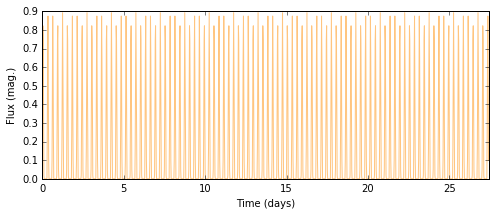

In [106]:
%matplotlib inline 
l = o.camera.catalog.lightcurves[lucky]
l.demo()
print l

In [107]:
0.1*3*24*60/2

216.00000000000003

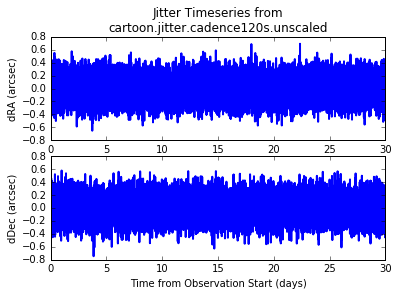

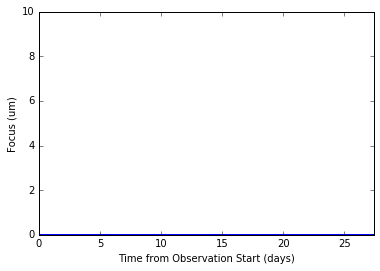

In [108]:
o.create()

In [2]:
# !ds9 /Users/zkbt/.tess/spyffi/outputs/testpattern_6to16_transit/120s/sub100x100/simulated_testpattern_6to16_sub100x100_0000*